### 標譜線
湯底是紅魚的 fake_script_haha.ipynb  
從他 github 上抓下來的  
可能進行一些改動  
主要是這個 cube 太他媽巨寬了，CARTA line query 找不太動  

處理的 cube : 
從 ESO 上抓下來的，觀測儀器是 MUSE(single)  
waveLenght range = [475, 935.2]nm  
freq ~= [6.31e5, 3.21e5]GHz，用人話念就是 63萬GHz 到 32萬GHz，媽的也太寬！       
pID = 094.B-0321

In [34]:
# modular
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [35]:
# get data file
#file_path = "/Users/aqing/Documents/1004/Circinus_galaxy/H-alpha/Muse_475nm-935.2nm_circinus_cube.tsv" # inp .tsv
file_path = "/Users/aqing/Documents/1004/Circinus_galaxy/H-alpha/Muse_475nm-935.2nm_circinus_cube_centerRegion.tsv"

# df = data file
df = pd.read_csv(file_path, sep="\t", skiprows=5) # 打開 .tsv 看看，前五行需要跳過
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 「 df.coiumns[0] 」代表第0欄的藍標題，就和df['FREQ']這是一個意思
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # pd.to_numeric(errors='coerce') 在遇到不是數字的直的時候，標記為 NaN
df = df.dropna()

freq = df[df.columns[0]] # 處理過後再讀入變數
flux = df[df.columns[1]] 

In [36]:
# Line info

z = 0.001448 # redshift
c = 3e8 # light velocity [m/s]

# (shiftedFreq [Hz], line_name, color)
bpt_lines = [(c*(1+z)/6563e-10, 'H-alpha', 'orange'),
             (c*(1+z)/4861e-10, 'H-beta', 'b'),
             (c*(1+z)/5007e-10, 'O[III]', 'c'),
             (c*(1+z)/6583e-10, 'N[II]', 'r')]
print(bpt_lines)

[(457769922291634.9, 'H-alpha', 'orange'), (618050606871014.1, 'H-beta', 'b'), (600028759736368.9, 'O[III]', 'c'), (456379158438401.9, 'N[II]', 'r')]


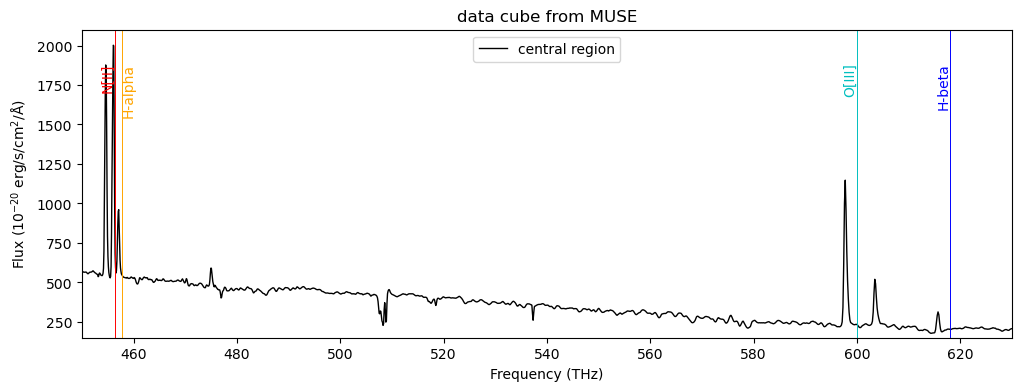

In [37]:
# four lines
# 我跟你說，全部畫一張圖的下場就是一坨

plt.figure(figsize=(12, 4))
plt.plot(freq/1e3, flux, c='k', lw=1, label="central region")
plt.xlim(450, 630) # THz
ymax = 2100
plt.ylim(150, ymax) # 超可悲之隨便設變數
plt.xlabel("Frequency (THz)") # 記得在 carta 裡面把軸換成頻率單位再導出成 .tsv
plt.ylabel(r"Flux ($10^{-20}$ erg/s/cm$^2$/Å)") # 我的 cube 是一個屁股單位，$ 啟用 latex # $ 啟用 latex
plt.title("data cube from MUSE")

for f, name, color in bpt_lines :
    plt.axvline(f/1e12, color=color, linestyle="-", lw=0.7)
    if name=='H-alpha':
        plt.text(f/1e12, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='left', va='top')
    else:
        plt.text(f/1e12, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='right', va='top')

plt.legend()
plt.show()

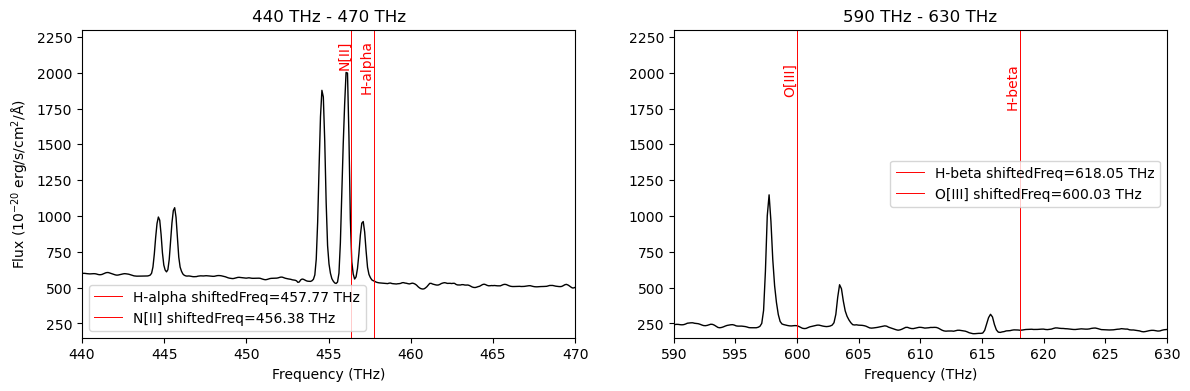

In [38]:
# bpt 的橫軸縱軸分開畫耶耶

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(freq/1e3, flux, c='k', lw=1)
ax[0].set_xlim(440, 470) #[THz]
ymax = 2300
ax[0].set_ylim(150, ymax)
ax[0].set_xlabel("Frequency (THz)")
ax[0].set_ylabel(r"Flux ($10^{-20}$ erg/s/cm$^2$/Å)") # $ 啟用 latex
ax[0].set_title("440 THz - 470 THz")
for f, name, color in bpt_lines :
    if name=='H-alpha' or name=='N[II]' :
        ax[0].axvline(f/1e12, color='r', linestyle="-", lw=0.7, label=f'{name} shiftedFreq={f/1e12:.2f} THz')
        # :.2f 代表顯示兩位浮點數
        ax[0].text(f/1e12, ymax*0.97, name, rotation=90, color='r', fontsize=10, ha='right', va='top')
ax[0].legend(loc='lower left')

ax[1].plot(freq/1e3, flux, c='k', lw=1)
ax[1].set_xlim(590, 630) #[THz]
ymax = 2300
ax[1].set_ylim(150, ymax)
ax[1].set_xlabel("Frequency (THz)")
ax[1].set_ylabel('')
ax[1].set_title("590 THz - 630 THz")
for f, name, color in bpt_lines :
    if name=='H-beta' or name=='O[III]' :
        ax[1].axvline(f/1e12, color='r', linestyle="-", lw=0.7, label=f'{name} shiftedFreq={f/1e12:.2f} THz')
        ax[1].text(f/1e12, ymax*0.9, name, rotation=90, color='r', fontsize=10, ha='right', va='top')
ax[1].legend(loc='right')

plt.show()

In [ ]:
# (freq-from-CARTA[THz], line_num, color, belog-to-which-ax)
suspect_lines = [(444.646894, 'line 1', 'gray', 0),
             (445.555808, 'line 2', 'gray', 0),
             (454.594861, 'line 3', 'blue', 0),
             (455.978112, 'line 4', 'blue', 0),
             (457.201087, 'line 5', 'blue', 0),
             (597.729375, 'line 6', 'blue', 1),
             (603.597877, 'line 7', 'gray', 1),
             (615.6900000, 'line 8', 'blue', 1)] # 咩

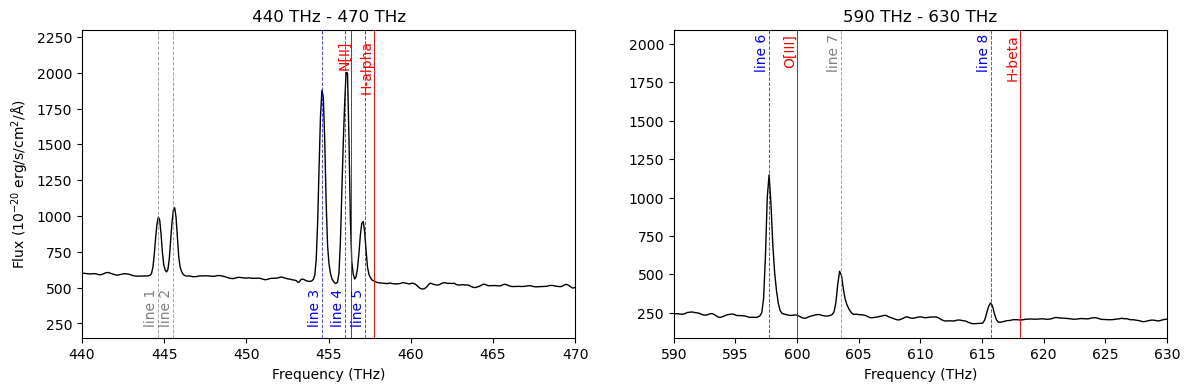

In [40]:
# 標個藍線

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# H-alpha && N[II]
ax[0].plot(freq/1e3, flux, c='k', lw=1)
ax[0].set_xlim(440, 470) #[THz]
ymax = 2300
ax[0].set_ylim(150, ymax)
ax[0].set_xlabel("Frequency (THz)")
ax[0].set_ylabel(r"Flux ($10^{-20}$ erg/s/cm$^2$/Å)") # $ 啟用 latex
ax[0].set_title("440 THz - 470 THz")
for f, name, color in bpt_lines :
    if name=='H-alpha' or name=='N[II]' :
        ax[0].axvline(f/1e12, color='r', linestyle="-", lw=0.7, label=f'{name} shiftedFreq={f/1e12:.2f} THz')
        # :.2f 代表顯示兩位浮點數
        ax[0].text(f/1e12, ymax*0.97, name, rotation=90, color='r', fontsize=10, ha='right', va='top')
for f, name, color, fig_index in suspect_lines :
    if fig_index==0 :
        ax[0].axvline(f, color=color, linestyle="--", lw=0.7, alpha=0.7, label=f'{name} shiftedFreq={f:.2f} THz')
        ax[0].text(f, ymax*0.1, name, rotation=90, color=color, fontsize=10, ha='right', va='bottom')
#ax[0].legend(loc='lower left')

# H-beta && O[III]
ax[1].plot(freq/1e3, flux, c='k', lw=1)
ax[1].set_xlim(590, 630) #[THz]
ymax = 2300
ax[0].set_ylim(150, ymax)
ax[1].set_xlabel("Frequency (THz)")
ax[1].set_ylabel('')
ax[1].set_title("590 THz - 630 THz")
for f, name, color in bpt_lines :
    if name=='H-beta' or name=='O[III]' :
        ax[1].axvline(f/1e12, color='r', linestyle="-", lw=0.7, label=f'{name} shiftedFreq={f/1e12:.2f} THz')
        ax[1].text(f/1e12, ymax*0.9, name, rotation=90, color='r', fontsize=10, ha='right', va='top')
for f, name, color, fig_index in suspect_lines :
    if fig_index==1 :
        ax[1].axvline(f, color=color, linestyle="--", lw=0.7, alpha=0.7, label=f'{name} shiftedFreq={f:.2f} THz')
        ax[1].text(f, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='right', va='top')
#ax[1].legend(loc='right')
plt.show()